In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import scipy.ndimage

In [ ]:
os.chdir('/content/drive/MyDrive/PhD/Courses/AMLDS/project')
os.listdir('./')

['heatmap_wd.ipynb', 'wd_runs', 'beta_runs', 'heatmap_beta.ipynb']

In [ ]:
def extract_scalar_data(logdir):
    accumulator = EventAccumulator(logdir, size_guidance={'scalars': 0})
    accumulator.Reload()

    # Extracting 'Testing Error' and 'Training Loss' data
    testing_error = []
    training_loss = []
    if 'Testing Error' in accumulator.Tags()['scalars']:
        for event in accumulator.Scalars('Testing Error'):
            testing_error.append(event.value)
    if 'Training Loss' in accumulator.Tags()['scalars']:
        for event in accumulator.Scalars('Training Loss'):
            training_loss.append(event.value)

    return min(testing_error) if testing_error else float('nan')

In [ ]:
def extract_lr_wd_from_filename(filename):
    components = filename.split('_')
    lr = float(components[2])
    wd = float(components[4])
    return lr, wd

In [ ]:
vmin=0.2
vmax=0.5

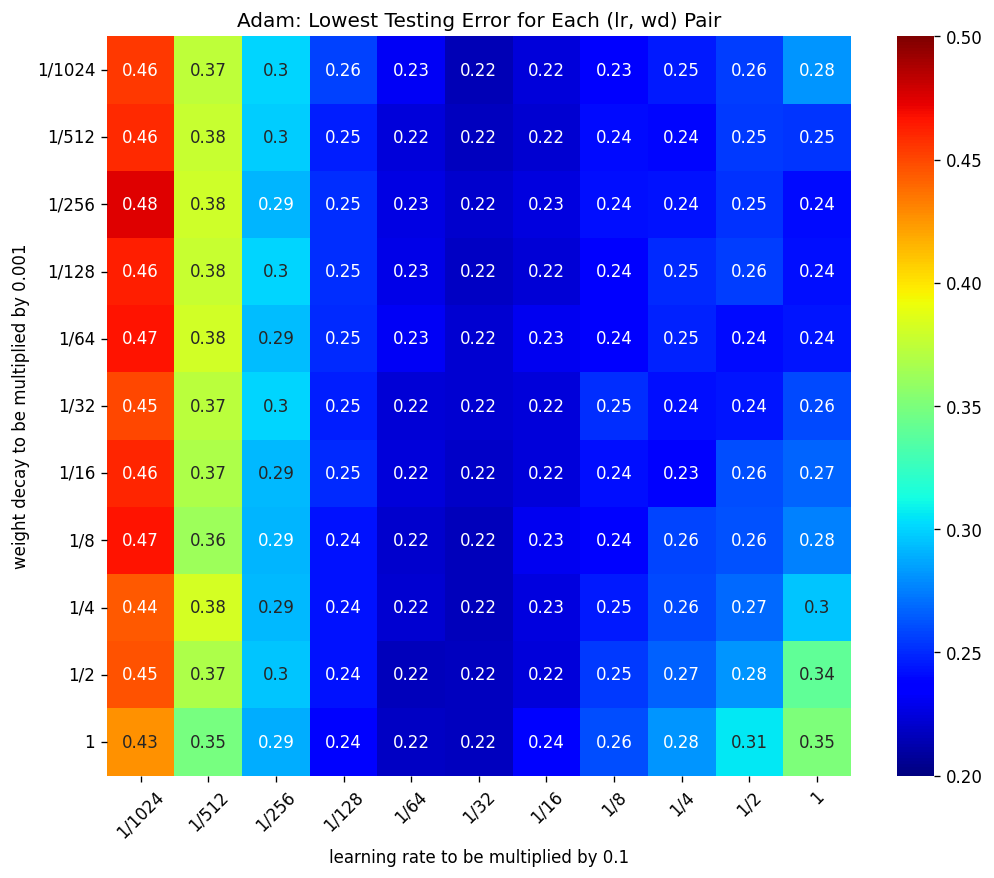

In [ ]:
# Load all log directories
log_dir_pattern = 'adam_lr_*'
log_dirs = [d for d in os.listdir('./wd_runs') if re.match(log_dir_pattern, d)]

# Extract data and create a dictionary to store the lowest errors
errors_dict = {}
for log_dir in log_dirs:
    lr, wd = extract_lr_wd_from_filename(log_dir)
    lowest_error = extract_scalar_data(os.path.join('./wd_runs', log_dir))
    errors_dict[(lr, wd)] = lowest_error

# Convert dictionary to a numpy array for heatmap
unique_lrs = sorted(set(lr for lr, _ in errors_dict.keys()))
unique_wds = sorted(set(wd for _, wd in errors_dict.keys()))
lowest_errors = np.zeros((len(unique_wds), len(unique_lrs)))

for i, lr in enumerate(unique_lrs):
    for j, wd in enumerate(unique_wds):
        lowest_errors[j, i] = errors_dict.get((lr, wd), 1)

xticklabels = [f'1/{2 ** i}' if i != 0 else '1' for i in range(10, -1, -1)]
yticklabels = [f'1/{2 ** i}' if i != 0 else '1' for i in range(10, -1, -1)]
plt.figure(figsize=(10, 8), dpi=120)
sns.heatmap(lowest_errors, annot=True, cmap='jet', vmin=0.2, vmax=0.5,
            xticklabels=xticklabels, yticklabels=yticklabels)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0, ha='right')
plt.xlabel('learning rate to be multiplied by 0.1')
plt.ylabel('weight decay to be multiplied by 0.001')
plt.title('Adam: Lowest Testing Error for Each (lr, wd) Pair')
plt.show()

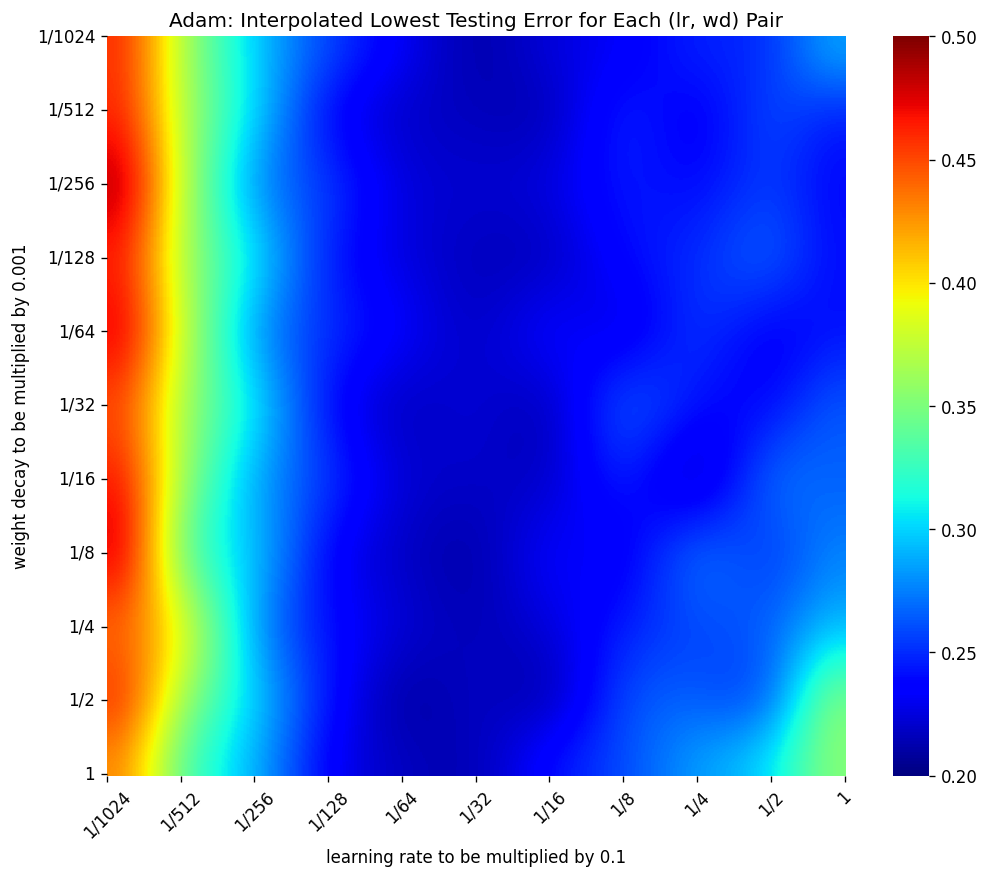

In [ ]:
# Generate the new interpolated grid for the heatmap data
new_size = 500
x = np.linspace(0, lowest_errors.shape[1] - 1, num=lowest_errors.shape[1])
y = np.linspace(0, lowest_errors.shape[0] - 1, num=lowest_errors.shape[0])
x_new = np.linspace(0, lowest_errors.shape[1] - 1, num=new_size)
y_new = np.linspace(0, lowest_errors.shape[0] - 1, num=new_size)
data_interpolated = scipy.ndimage.zoom(lowest_errors, (len(y_new)/len(y), len(x_new)/len(x)))

# Create the interpolated heatmap using seaborn
plt.figure(figsize=(10, 8), dpi=120)
ax = sns.heatmap(data_interpolated, cmap='jet', vmin=0.2, vmax=0.5)
ax.set_aspect('equal')

# Since we have more data points now, we need to adjust the ticks to match the new grid size.
xticks = np.linspace(0, new_size - 1, num=len(xticklabels))
yticks = np.linspace(0, new_size - 1, num=len(yticklabels))
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)

# Set other plot properties
plt.xticks(rotation=45, ha='center')
plt.xlabel('learning rate to be multiplied by 0.1')
plt.ylabel('weight decay to be multiplied by 0.001')
plt.title('Adam: Interpolated Lowest Testing Error for Each (lr, wd) Pair')
plt.show()

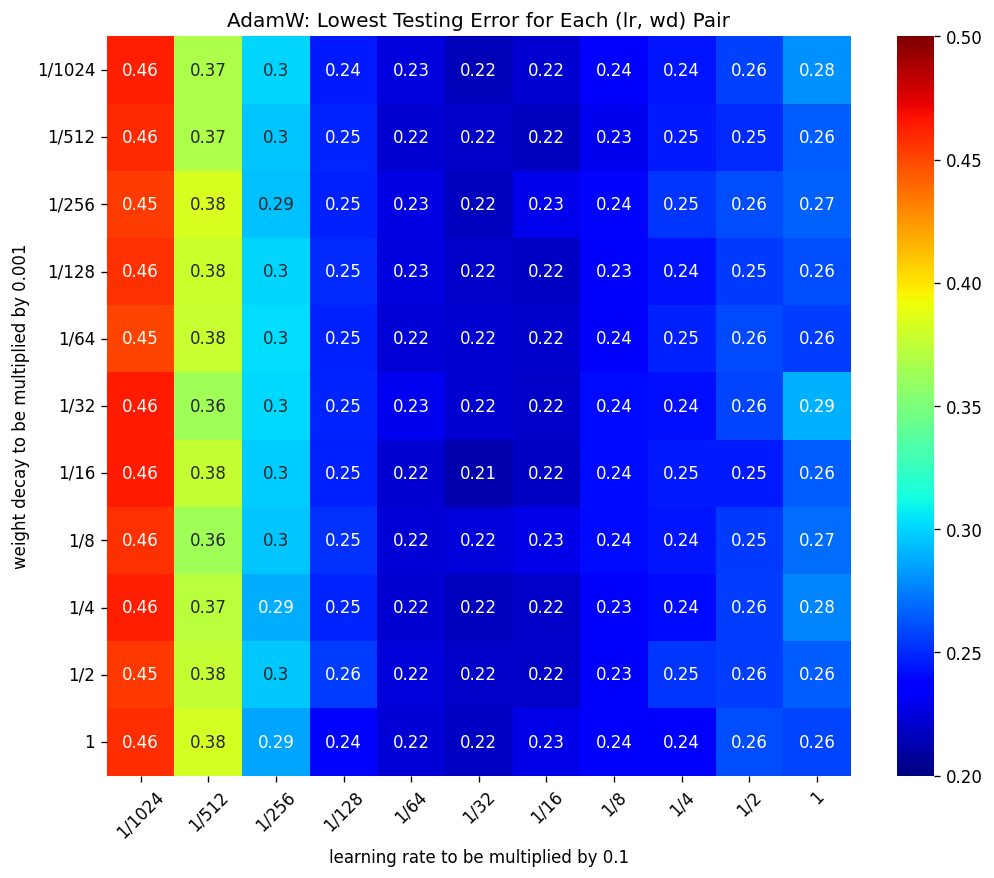

In [ ]:
# Load all log directories
log_dir_pattern = 'adamw_lr_*'
log_dirs = [d for d in os.listdir('./wd_runs') if re.match(log_dir_pattern, d)]

# Extract data and create a dictionary to store the lowest errors
errors_dict = {}
for log_dir in log_dirs:
    lr, wd = extract_lr_wd_from_filename(log_dir)
    lowest_error = extract_scalar_data(os.path.join('./wd_runs', log_dir))
    errors_dict[(lr, wd)] = lowest_error

# Convert dictionary to a numpy array for heatmap
unique_lrs = sorted(set(lr for lr, _ in errors_dict.keys()))
unique_wds = sorted(set(wd for _, wd in errors_dict.keys()))
lowest_errors = np.zeros((len(unique_wds), len(unique_lrs)))

for i, lr in enumerate(unique_lrs):
    for j, wd in enumerate(unique_wds):
        lowest_errors[j, i] = errors_dict.get((lr, wd), 1)

xticklabels = [f'1/{2 ** i}' if i != 0 else '1' for i in range(10, -1, -1)]
yticklabels = [f'1/{2 ** i}' if i != 0 else '1' for i in range(10, -1, -1)]
plt.figure(figsize=(10, 8), dpi=120)
sns.heatmap(lowest_errors, annot=True, cmap='jet', vmin=0.2, vmax=0.5,
            xticklabels=xticklabels, yticklabels=yticklabels)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0, ha='right')
plt.xlabel('learning rate to be multiplied by 0.1')
plt.ylabel('weight decay to be multiplied by 0.001')
plt.title('AdamW: Lowest Testing Error for Each (lr, wd) Pair')
plt.show()

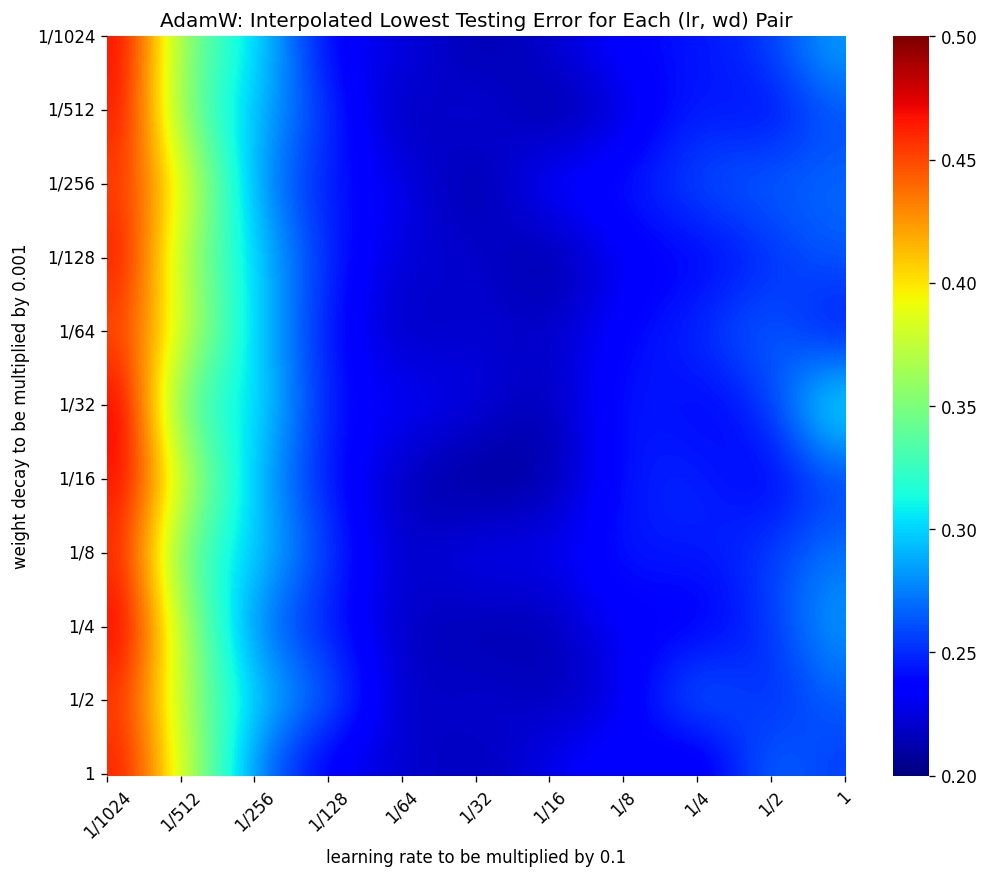

In [ ]:
# Generate the new interpolated grid for the heatmap data
new_size = 500
x = np.linspace(0, lowest_errors.shape[1] - 1, num=lowest_errors.shape[1])
y = np.linspace(0, lowest_errors.shape[0] - 1, num=lowest_errors.shape[0])
x_new = np.linspace(0, lowest_errors.shape[1] - 1, num=new_size)
y_new = np.linspace(0, lowest_errors.shape[0] - 1, num=new_size)
data_interpolated = scipy.ndimage.zoom(lowest_errors, (len(y_new)/len(y), len(x_new)/len(x)))

# Create the interpolated heatmap using seaborn
plt.figure(figsize=(10, 8), dpi=120)
ax = sns.heatmap(data_interpolated, cmap='jet', vmin=0.2, vmax=0.5)
ax.set_aspect('equal')

# Since we have more data points now, we need to adjust the ticks to match the new grid size.
xticks = np.linspace(0, new_size - 1, num=len(xticklabels))
yticks = np.linspace(0, new_size - 1, num=len(yticklabels))
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)

# Set other plot properties
plt.xticks(rotation=45, ha='center')
plt.xlabel('learning rate to be multiplied by 0.1')
plt.ylabel('weight decay to be multiplied by 0.001')
plt.title('AdamW: Interpolated Lowest Testing Error for Each (lr, wd) Pair')
plt.show()